In [1]:
#Importing Necessary Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# About the Dataset

The dataset is taken from Kaggle.It is the statevice data of covid 19 cases in India.

In [2]:
india_covid_19=pd.read_csv(r'covid_19_india.csv',usecols=["State/UnionTerritory","Cured","Deaths","Confirmed"])

In [3]:
india_covid_19.sort_values('Confirmed', ascending= False)

,State/UnionTerritory,Cured,Deaths,Confirmed
5845,Maharashtra,584537,24903,808306
5810,Maharashtra,573559,24583,792541
5775,Maharashtra,562401,24399,780689
5740,Maharashtra,554711,24103,764281
5705,Maharashtra,543170,23775,747995
...,...,...,...,...
981,Nagaland,0,0,0
1047,Nagaland,0,0,0
1014,Nagaland,0,0,0
1113,Nagaland,0,0,0


For more understanding the state vice data I have added one more column of "Active" cases in india from the given data.

In [4]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases.sort_values('Confirmed', ascending= False)

<ipython-input-4-55dedb99e6e7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()


,State/UnionTerritory,Confirmed,Deaths,Cured,Active
22,Maharashtra,808306,24903,584537,198866
1,Andhra Pradesh,445139,4053,339876,101210
32,Tamil Nadu,433969,7418,374172,52379
18,Karnataka,351481,5837,254626,91018
39,Uttar Pradesh,235757,3542,176677,55538
11,Delhi,177060,4462,156728,15870
41,West Bengal,165721,3283,137616,24822
4,Bihar,138349,621,121560,16168
35,Telengana,130589,846,97402,32341
3,Assam,111724,315,86895,24514


# DataPreprocessing

***pandas describe() method***

I look at the descriptive statistics of the dataframe with the pandas describe() method.

In [5]:
state_cases.describe(include="all")

,State/UnionTerritory,Confirmed,Deaths,Cured,Active
count,42,42.000000,42.000000,42.000000,42.000000
unique,42,NaN,NaN,NaN,NaN
top,Jammu and Kashmir,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,93870.476190,1612.642857,72059.166667,20198.666667
std,NaN,157465.283705,4066.602776,119488.813440,35933.066896
min,NaN,2.000000,0.000000,0.000000,2.000000
25%,NaN,4296.500000,30.500000,2780.250000,1301.250000
50%,NaN,41028.000000,306.500000,28816.500000,11781.000000
75%,NaN,104328.000000,1013.250000,80299.250000,16093.500000


***Data Cleaning***

In [6]:
state_cases.shape

(42, 5)

In [7]:
state_cases=state_cases.drop_duplicates()

In [8]:
state_cases.shape

(42, 5)

***pandas isnull() method***

I viewed the null values of the dataframe with the pandas isnull() method.

In [9]:
state_cases.isnull().sum()

State/UnionTerritory    0
Confirmed               0
Deaths                  0
Cured                   0
Active                  0
dtype: int64

In [10]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active
0,Andaman and Nicobar Islands,3160,46,2714,400
1,Andhra Pradesh,445139,4053,339876,101210
2,Arunachal Pradesh,4212,7,2979,1226
3,Assam,111724,315,86895,24514
4,Bihar,138349,621,121560,16168


In [11]:
#assigning the dependent and independent variables
X = np.array(state_cases["Confirmed"]).reshape(-1, 1) 
y = np.array(state_cases['Cured']).reshape(-1, 1)
X,y

(array([[  3160],
        [445139],
        [  4212],
        [111724],
        [138349],
        [  9265],
        [  4550],
        [ 33387],
        [    26],
        [  2386],
        [     2],
        [177060],
        [ 18006],
        [ 97629],
        [ 66426],
        [  6255],
        [ 38223],
        [ 43833],
        [351481],
        [ 76525],
        [  2733],
        [ 65490],
        [808306],
        [  6382],
        [  2440],
        [  1020],
        [  4003],
        [106561],
        [ 14766],
        [ 55508],
        [ 83163],
        [  1670],
        [433969],
        [ 54059],
        [ 52466],
        [130589],
        [ 57142],
        [ 12702],
        [    77],
        [235757],
        [ 20398],
        [165721]], dtype=int64),
 array([[  2714],
        [339876],
        [  2979],
        [ 86895],
        [121560],
        [     0],
        [  2551],
        [ 17567],
        [     2],
        [  2122],
        [     0],
        [156728],
        [ 138

# ***Visual exploratory data analysis***

I visualize the relationship between X and y by plotting a scatterplot between X and y.

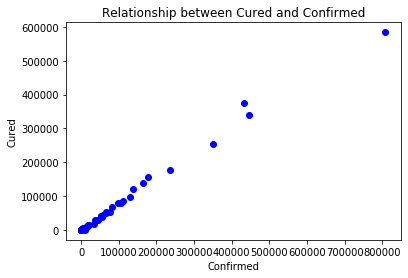

In [12]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Cured and Confirmed')
plt.xlabel('Confirmed')
plt.ylabel('Cured')

plt.show()

# Train test split

I split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape,y_train.shape

((33, 1), (33, 1))

In [15]:
X_test.shape,y_test.shape

((9, 1), (9, 1))

***Instantiate the linear regression object Lg***

In [16]:
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()

***Train the model using training data set***

In [17]:
Lr.fit(X_train, y_train)

LinearRegression()

***Predict on the test data***

In [18]:
y_pred = Lr.predict(X_test)

In [19]:
y_pred, y_test

(array([[ 63054.05258596],
        [ 43456.29769837],
        [ 80676.29111868],
        [104617.47064164],
        [   421.22163376],
        [  1187.92984926],
        [ 11540.750213  ],
        [133772.7179209 ],
        [  9986.24554031]]),
 array([[ 68124],
        [ 42909],
        [ 80770],
        [121560],
        [     0],
        [   612],
        [  9675],
        [156728],
        [  7847]], dtype=int64))

In [20]:
variance=y_test-y_pred
variance

array([[ 5069.94741404],
       [ -547.29769837],
       [   93.70888132],
       [16942.52935836],
       [ -421.22163376],
       [ -575.92984926],
       [-1865.750213  ],
       [22955.2820791 ],
       [-2139.24554031]])

In [21]:
m = Lr.coef_
c = Lr.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[0.75315149]]
Estimated model intercept, c: (array([419.71533078]),)


# So, our fitted regression line is 

# y = 0.75315149 * x + 419.71533078 

# That is our linear model.

#  ** Prediction

In [22]:
Lr.predict(X)[0:5]  #prediction on first 5 states

array([[  2799.67403509],
       [335676.81586147],
       [  3591.98940121],
       [ 84564.81225487],
       [104617.47064164]])

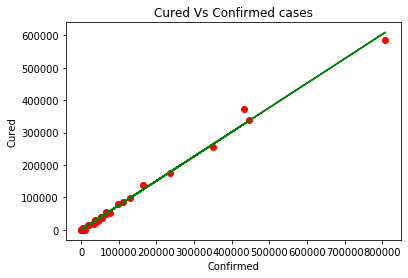

In [23]:
# visualising the training set results
plt.scatter(X_train, y_train,color ='red')
plt.plot(X_train, Lr.predict(X_train),color = 'green')
plt.title('Cured Vs Confirmed cases')
plt.xlabel('Confirmed')
plt.ylabel('Cured')
plt.show()

# RMSE (Root Mean Square Error) and R-Squared Value
RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 9710.0948


***R2 Score = Explained Variation/Total Variation***

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [25]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9674


# Interpretation and Conclusion

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .0.9674. It means that this model explains 96.74 % of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it does provide good fit to the data.

In [26]:
print("Training set score: {:.4f}".format(Lr.score(X_train,y_train)))

print("Test set score: {:.4f}".format(Lr.score(X_test,y_test)))

Training set score: 0.9940
Test set score: 0.9674
